In [13]:
!pip install wordcloud
!pip install openpyxl
!pip install tensorflow


import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import classification_report  # Import classification_report
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Load data
data = pd.read_excel('Final_dataset.xlsx')
data.head()


,S/N,CASE TITLE,SUIT NO,CITATION,STORY,ISSUES
0,NaN,UKPABI v. UKPABI & ORS,CA/OW/571/2018,(2019) LPELR-48481(CA),INTRODUCTION: This appeal borders on civil pr...,Effect of a ground of appeal from which no iss...
1,NaN,EKWUGHA v. STATE,CA/OW/576C/2018,(2020) LPELR-50629(CA),INTRODUCTION: This appeal borders on the Offe...,Position of the law on a no case submission\n ...
2,NaN,ROCHE CONSTRUCTION (NIG) LTD & ANOR v. ENYIDEDE,CA/OW/58/2015,(2017) LPELR-42438(CA),INTRODUCTION: &nbsp;This appeal borders on Ci...,Whether a party is allowed to formulate more i...
3,NaN,CHARLES v. COP ABIA STATE,CA/OW/58/2020,(2021) LPELR-56547(CA),INTRODUCTION: This appeal borders on enforceme...,Position of the law on remanding an accused pe...
4,NaN,UKAEGBU v. OGBUISI & ANOR,CA/OW/58M/2019(R),(2020) LPELR-49719(CA),INTRODUCTION: This is a ruling on an applicati...,Effect of failure to make reference to and/or ...


In [3]:
 # Display the first few rows of the dataset
print(data.head()) 

   S/N                                       CASE TITLE            SUIT NO  \
0  NaN                           UKPABI v. UKPABI & ORS     CA/OW/571/2018   
1  NaN                                 EKWUGHA v. STATE    CA/OW/576C/2018   
2  NaN  ROCHE CONSTRUCTION (NIG) LTD & ANOR v. ENYIDEDE      CA/OW/58/2015   
3  NaN                        CHARLES v. COP ABIA STATE      CA/OW/58/2020   
4  NaN                        UKAEGBU v. OGBUISI & ANOR  CA/OW/58M/2019(R)   

                 CITATION                                              STORY  \
0  (2019) LPELR-48481(CA)  INTRODUCTION:  This appeal borders on civil pr...   
1  (2020) LPELR-50629(CA)  INTRODUCTION:  This appeal borders on the Offe...   
2  (2017) LPELR-42438(CA)  INTRODUCTION:  &nbsp;This appeal borders on Ci...   
3  (2021) LPELR-56547(CA)  INTRODUCTION: This appeal borders on enforceme...   
4  (2020) LPELR-49719(CA)  INTRODUCTION: This is a ruling on an applicati...   

                                              ISSU

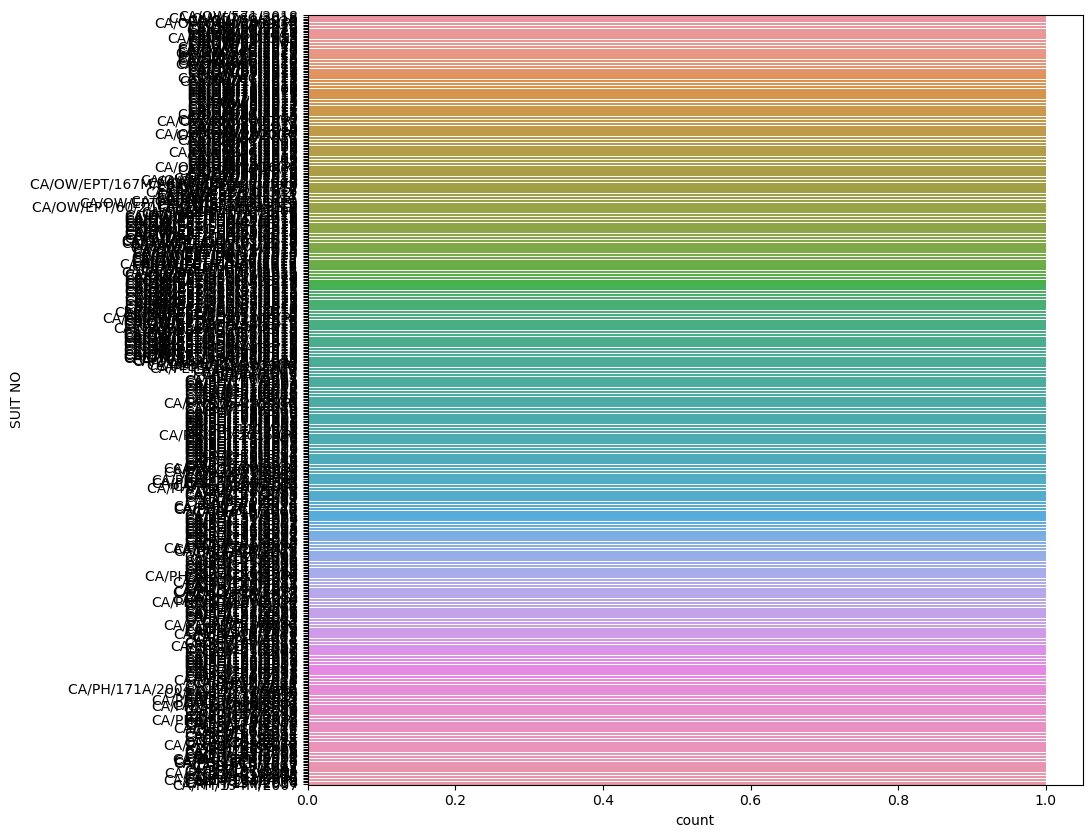

In [4]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['SUIT NO'], data = data)
plt.show()

In [5]:
# Feature Engineering: Extracting Features from CASE TITLE
case_split = data['CASE TITLE'].str.split(' v. ', expand=True)
case_split.columns = ['PLAINTIFF', 'DEFENDANT']
data = pd.concat([data, case_split], axis=1)

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


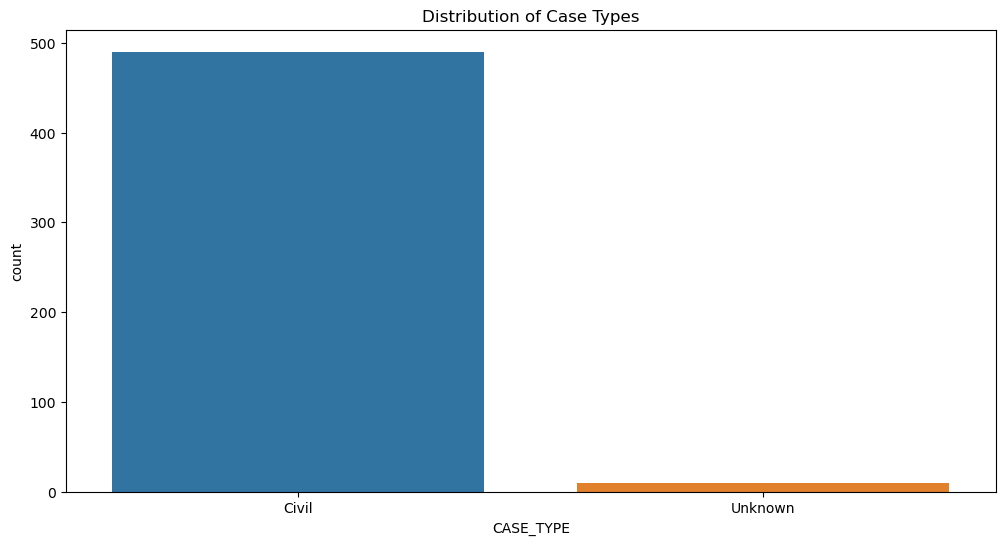

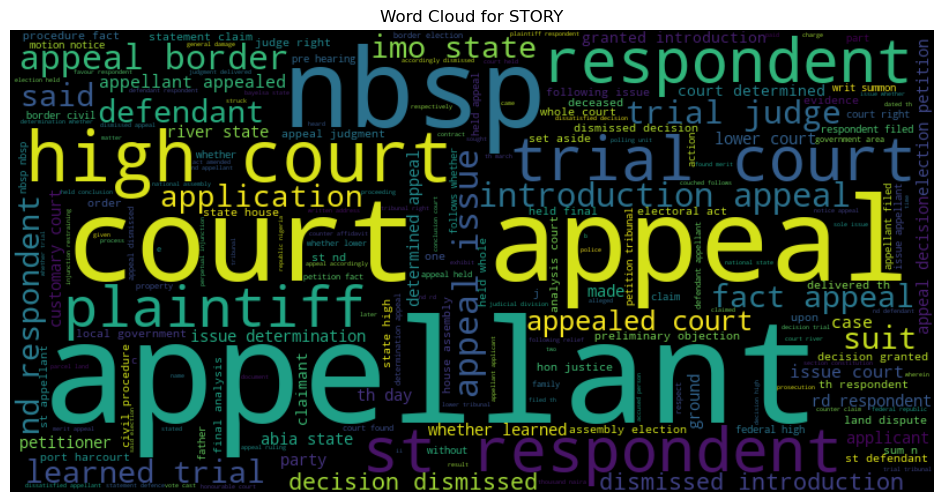

In [6]:
# Handling cases without ' v. ' by filling NA values appropriately
data['PLAINTIFF'].fillna('Unknown', inplace=True)
data['DEFENDANT'].fillna('Unknown', inplace=True)

data['CASE_TYPE'] = data['CASE TITLE'].apply(lambda x: 'Civil' if ' v. ' in x else 'Unknown')

# Handling NaN values in text columns before vectorization
data['STORY'].fillna('', inplace=True)
data['ISSUES'].fillna('', inplace=True)

# Text Preprocessing: Clean and tokenize the text
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    words = nltk.word_tokenize(text)  # Tokenize text into words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(words)

data['Cleaned_STORY'] = data['STORY'].apply(preprocess_text)
data['Cleaned_ISSUES'] = data['ISSUES'].apply(preprocess_text)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.countplot(x='CASE_TYPE', data=data)
plt.title('Distribution of Case Types')
plt.show()

plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400).generate(' '.join(data['Cleaned_STORY']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for STORY')
plt.show()

In [7]:
# Textual Features: TF-IDF Vectors
tfidf_vectorizer_story = TfidfVectorizer(max_features=5000)
tfidf_story = tfidf_vectorizer_story.fit_transform(data['Cleaned_STORY']).toarray()

tfidf_vectorizer_issues = TfidfVectorizer(max_features=5000)
tfidf_issues = tfidf_vectorizer_issues.fit_transform(data['Cleaned_ISSUES']).toarray()


In [8]:
from sklearn.preprocessing import LabelEncoder
		
y = ['CASE TITLE', 'SUIT NO', 'CITATION', 'STORY', 'ISSUES']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(y_encoded)


[0 4 1 3 2]


In [9]:
y = data['SUIT NO']

# Encode the target variable 'y'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(y_encoded)

# Combine rare classes
y_combined = y.copy()

# Identify classes with very few instances
counts = y_combined.value_counts()
rare_classes = counts[counts < 2].index

y_combined[y_combined.isin(rare_classes)] = 'Rare'

# Perform train-test split
X = data[['CASE TITLE', 'STORY']]  # Select features (X)
X_train, X_test, y_train, y_test = train_test_split(X, y_combined, test_size=0.2, random_state=42)

# Encode the target variable if necessary
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [10]:
from sklearn.model_selection import train_test_split

# Assuming X_mod and y_mod are already defined
# X_mod should contain your features and y_mod your target variable

# Perform train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y_combined, test_size=0.2, random_state=42)

# Print the shapes of the resulting arrays
print("Shapes after train-test split:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Shapes after train-test split:
X_train shape: (400, 2)
y_train shape: (400,)
X_test shape: (100, 2)
y_test shape: (100,)


In [14]:
# Define the neural network model
num_classes = len(label_encoder.classes_)
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/50


/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
2024-07-06 09:15:08.091276: W tensorflow/core/framework/op_kernel.cc:1816] OP_REQUIRES failed at cast_op.cc:122 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node sequential_2_1/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/mac/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Users/mac/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Users/mac/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 729, in execute_request

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 411, in do_execute

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 531, in run_cell

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code

  File "/var/folders/nn/qdfjyt1n3_lcc686ypnpkj7c0000gn/T/ipykernel_18806/363709267.py", line 14, in <module>

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/models/sequential.py", line 209, in call

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/models/functional.py", line 167, in call

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/models/functional.py", line 258, in _standardize_inputs

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/models/functional.py", line 218, in _convert_inputs_to_tensors

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/ops/core.py", line 743, in convert_to_tensor

  File "/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/core.py", line 120, in convert_to_tensor

Cast string to float is not supported
	 [[{{node sequential_2_1/Cast}}]] [Op:__inference_one_step_on_iterator_1395]